# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [80]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [81]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

In [49]:
cities


['dikson',
 'kapaa',
 'cherskiy',
 'qaanaaq',
 'khatanga',
 'ushuaia',
 'punta arenas',
 'hermanus',
 'mayskiy',
 'busselton',
 'rikitea',
 'rawson',
 'tsihombe',
 'puerto ayora',
 'clyde river',
 'tuktoyaktuk',
 'poum',
 'bredasdorp',
 'marystown',
 'hilo',
 'mazamari',
 'ulladulla',
 'palabuhanratu',
 'erenhot',
 'lesosibirsk',
 'albany',
 'mahebourg',
 'gualaco',
 'hithadhoo',
 'waddan',
 'faanui',
 'vaini',
 'san cristobal',
 'kenai',
 'saskylakh',
 'pervomayskiy',
 'laguna',
 'yellowknife',
 'barentsburg',
 'fortuna',
 'upernavik',
 'iwanai',
 'torbay',
 'arraial do cabo',
 'salalah',
 'taksimo',
 'ulaangom',
 'chicama',
 'provideniya',
 'yushan',
 'avera',
 'new norfolk',
 'lagoa',
 'betioky',
 'saldanha',
 'mount gambier',
 'bethel',
 'thompson',
 'jamestown',
 'aksu',
 'mar del plata',
 'luderitz',
 'attawapiskat',
 'saleaula',
 'hare bay',
 'zyryanka',
 'barrow',
 'aksarka',
 'mataura',
 'pangody',
 'aykhal',
 'tasiilaq',
 'padang',
 'carnarvon',
 'vanavara',
 'ust-tsilma',
 '

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [50]:
query_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
     

In [78]:
# set up lists to hold reponse info
lat = []
lng = []
temp = []
humidity = []
wind_speed = []
cloud_cover = []
city_list = []
country = []
date = []
citycount = 0
for city in cities:
    citycount = citycount +1
    response = requests.get(f"{query_url}&q={city}").json()
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        cloud_cover.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_list.append(city)
        print(f" Processing {citycount} , {city}")
    except KeyError:
        print (f"The city {city} was not found.")
  


 Processing 1 , dikson
 Processing 2 , kapaa
 Processing 3 , cherskiy
 Processing 4 , qaanaaq
 Processing 5 , khatanga
 Processing 6 , ushuaia
 Processing 7 , punta arenas
 Processing 8 , hermanus
 Processing 9 , mayskiy
 Processing 10 , busselton
 Processing 11 , rikitea
 Processing 12 , rawson
The city tsihombe was not found.
 Processing 14 , puerto ayora
 Processing 15 , clyde river
 Processing 16 , tuktoyaktuk
 Processing 17 , poum
 Processing 18 , bredasdorp
 Processing 19 , marystown
 Processing 20 , hilo
 Processing 21 , mazamari
 Processing 22 , ulladulla
The city palabuhanratu was not found.
 Processing 24 , erenhot
 Processing 25 , lesosibirsk
 Processing 26 , albany
 Processing 27 , mahebourg
 Processing 28 , gualaco
 Processing 29 , hithadhoo
 Processing 30 , waddan
 Processing 31 , faanui
 Processing 32 , vaini
 Processing 33 , san cristobal
 Processing 34 , kenai
 Processing 35 , saskylakh
 Processing 36 , pervomayskiy
 Processing 37 , laguna
 Processing 38 , yellowknife


 Processing 297 , palmer
 Processing 298 , sitka
 Processing 299 , senador jose porfirio
 Processing 300 , sorong
 Processing 301 , lipari
The city achisay was not found.
The city utiroa was not found.
 Processing 304 , dongsheng
The city sataua was not found.
 Processing 306 , maragogi
 Processing 307 , bose
 Processing 308 , deep river
 Processing 309 , taltal
 Processing 310 , lucea
 Processing 311 , chabahar
 Processing 312 , pisco
 Processing 313 , bowen
 Processing 314 , margate
 Processing 315 , torzhok
 Processing 316 , mae sot
 Processing 317 , mazagao
 Processing 318 , jalu
 Processing 319 , asau
 Processing 320 , nouadhibou
 Processing 321 , talnakh
 Processing 322 , la palma
 Processing 323 , massakory
 Processing 324 , sovetskiy
 Processing 325 , manggar
The city labutta was not found.
 Processing 327 , ous
 Processing 328 , alofi
 Processing 329 , aklavik
 Processing 330 , bubaque
 Processing 331 , tura
 Processing 332 , arica
 Processing 333 , dharchula
 Processing 334 ,

 Processing 594 , ithaca


In [52]:
#print(lat)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [53]:
weather_dict = {
    "lat": lat,
    "lng": lng,
    "temp": temp,
    "humidity": humidity,
    "wind_speed":wind_speed,
    "cloud_cover":cloud_cover,
    "city_list":city_list,
    "country":country,
    "date":date
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,lat,lng,temp,humidity,wind_speed,cloud_cover,city_list,country,date
0,73.51,80.55,5.54,93,8.25,100,dikson,RU,1588812276
1,22.08,-159.32,78.35,74,16.11,40,kapaa,US,1588812233
2,68.75,161.30,33.87,88,6.73,100,cherskiy,RU,1588812038
3,77.48,-69.36,13.55,91,5.66,100,qaanaaq,GL,1588812305
4,71.97,102.50,11.80,91,13.33,100,khatanga,RU,1588812287


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [54]:
#  Get the indices of cities that have humidity over 100%.
  # None exist in the .describe
idx100 = weather_data[weather_data['humidity'] > 100].index
cleaned_weather_data = weather_data.drop(idx100, inplace=False)
cleaned_weather_data.head()

,lat,lng,temp,humidity,wind_speed,cloud_cover,city_list,country,date
0,73.51,80.55,5.54,93,8.25,100,dikson,RU,1588812276
1,22.08,-159.32,78.35,74,16.11,40,kapaa,US,1588812233
2,68.75,161.30,33.87,88,6.73,100,cherskiy,RU,1588812038
3,77.48,-69.36,13.55,91,5.66,100,qaanaaq,GL,1588812305
4,71.97,102.50,11.80,91,13.33,100,khatanga,RU,1588812287


In [55]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# See above.

In [56]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 0, 'Latitude')

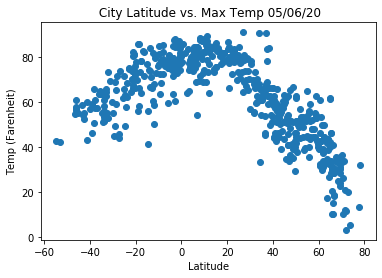

In [57]:
# Scatter Plot City Latitude vs Max Temp
plt.scatter(cleaned_weather_data["lat"], cleaned_weather_data["temp"], marker = "o")
plt.title(f' City Latitude vs. Max Temp {time.strftime("%m/%d/%y")}')
plt.ylabel("Temp (Farenheit)")
plt.xlabel("Latitude")
# The closer to the equator 0 degrees lat, the higher the temps, decending on either side of the midline.

## Latitude vs. Humidity Plot

Text(0.5, 0, 'Latitude')

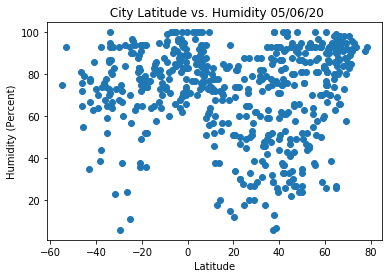

In [58]:
plt.scatter(cleaned_weather_data["lat"], cleaned_weather_data["humidity"], marker = "o")
plt.title(f' City Latitude vs. Humidity {time.strftime("%m/%d/%y")}')
plt.ylabel("Humidity (Percent)")
plt.xlabel("Latitude")

## Latitude vs. Cloudiness Plot

Text(0.5, 0, 'Latitude')

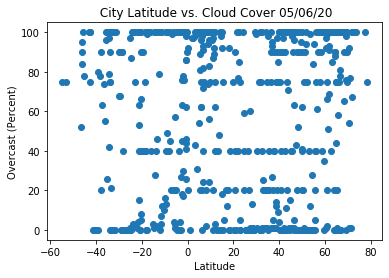

In [59]:
plt.scatter(cleaned_weather_data["lat"], cleaned_weather_data["cloud_cover"], marker = "o")
plt.title(f' City Latitude vs. Cloud Cover {time.strftime("%m/%d/%y")}')
plt.ylabel("Overcast (Percent)")
plt.xlabel("Latitude")

## Latitude vs. Wind Speed Plot

Text(0.5, 0, 'Latitude')

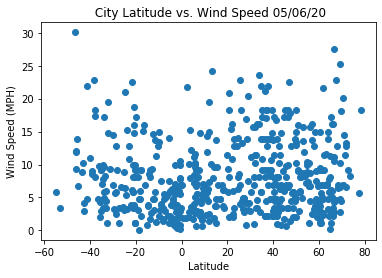

In [60]:
plt.scatter(cleaned_weather_data["lat"], cleaned_weather_data["wind_speed"], marker = "o")
plt.title(f' City Latitude vs. Wind Speed {time.strftime("%m/%d/%y")}')
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")

## Linear Regression

In [61]:
# OPTIONAL: Create a function to create Linear Regression plots

In [62]:
# Create Northern and Southern Hemisphere DataFrames
north_df = weather_data.copy()
northern_df = north_df[north_df["lat"] > 0]
northern_df

,lat,lng,temp,humidity,wind_speed,cloud_cover,city_list,country,date
0,73.51,80.55,5.54,93,8.25,100,dikson,RU,1588812276
1,22.08,-159.32,78.35,74,16.11,40,kapaa,US,1588812233
2,68.75,161.30,33.87,88,6.73,100,cherskiy,RU,1588812038
3,77.48,-69.36,13.55,91,5.66,100,qaanaaq,GL,1588812305
4,71.97,102.50,11.80,91,13.33,100,khatanga,RU,1588812287
...,...,...,...,...,...,...,...,...,...
533,65.32,21.48,33.80,69,1.12,0,pitea,SE,1588812690
534,68.53,146.42,29.62,98,6.42,65,belaya gora,RU,1588812690
537,6.50,2.60,84.20,83,9.17,40,porto novo,BJ,1588812691
539,14.40,46.47,73.53,53,3.71,98,marzuq,YE,1588812691


In [63]:
# Create Northern and Southern Hemisphere DataFrames
south_df = weather_data.copy()
southern_df = south_df[south_df["lat"] < 0]
southern_df

,lat,lng,temp,humidity,wind_speed,cloud_cover,city_list,country,date
5,-54.80,-68.30,42.80,75,5.82,75,ushuaia,AR,1588811960
6,-53.15,-70.92,42.39,93,3.36,75,punta arenas,CL,1588812236
7,-34.42,19.23,64.00,73,9.91,42,hermanus,ZA,1588812278
9,-33.65,115.33,53.37,65,8.19,100,busselton,AU,1588812218
10,-23.12,-134.97,74.88,63,10.85,100,rikitea,PF,1588812234
...,...,...,...,...,...,...,...,...,...
528,-3.55,143.63,84.87,68,1.68,100,wewak,PG,1588812689
530,-32.03,-52.10,53.01,83,14.72,0,rio grande,BR,1588812493
535,-35.93,173.88,63.79,68,9.82,55,dargaville,NZ,1588812604
536,-7.95,110.28,79.36,81,1.77,100,bambanglipuro,ID,1588812393


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

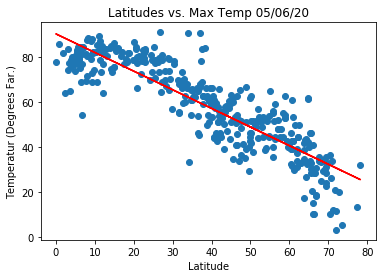

In [64]:
plt.scatter(northern_df["lat"], northern_df["temp"], marker = "o")
plt.title(f'Latitudes vs. Max Temp {time.strftime("%m/%d/%y")}')
plt.ylabel("Temperatur (Degrees Far.)")
plt.xlabel("Latitude")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_df["lat"], northern_df["temp"])
regress_values = northern_df["lat"] * slope + intercept
plt.plot(northern_df["lat"],regress_values,color = "red")
          ## The further north you go, the colder it gets.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

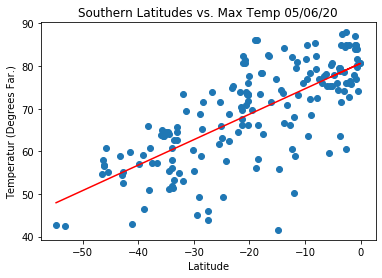

In [65]:
plt.scatter(southern_df["lat"], southern_df["temp"], marker = "o")
plt.title(f'Southern Latitudes vs. Max Temp {time.strftime("%m/%d/%y")}')
plt.ylabel("Temperatur (Degrees Far.)")
plt.xlabel("Latitude")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df["lat"], southern_df["temp"])
regress_values = southern_df["lat"] * slope + intercept
plt.plot(southern_df["lat"],regress_values,color = "red")          
          # Further south it get's very cold, closer to the equator (0), the warmer it is.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

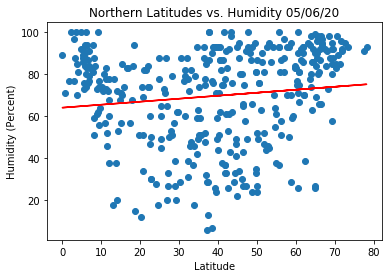

In [66]:
plt.scatter(northern_df["lat"], northern_df["humidity"], marker = "o")
plt.title(f'Northern Latitudes vs. Humidity {time.strftime("%m/%d/%y")}')
plt.ylabel("Humidity (Percent)")
plt.xlabel("Latitude")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_df["lat"], northern_df["humidity"])
regress_values = northern_df["lat"] * slope + intercept
plt.plot(northern_df["lat"],regress_values,color = "red")          
          # Mid latitudes are humid as they are impacted with lots of moisture.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

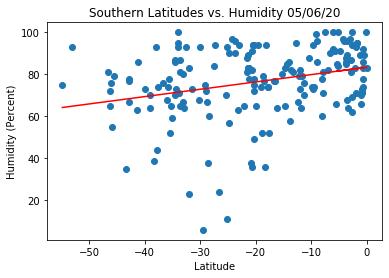

In [67]:
plt.scatter(southern_df["lat"], southern_df["humidity"], marker = "o")
plt.title(f'Southern Latitudes vs. Humidity {time.strftime("%m/%d/%y")}')
plt.ylabel("Humidity (Percent)")
plt.xlabel("Latitude")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df["lat"], southern_df["humidity"])
regress_values = southern_df["lat"] * slope + intercept
plt.plot(southern_df["lat"],regress_values,color = "red")    
          # Mid latitudes are humid as they are impacted with lots of moisture.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

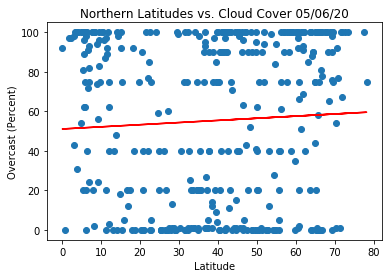

In [68]:
plt.scatter(northern_df["lat"], northern_df["cloud_cover"], marker = "o")
plt.title(f'Northern Latitudes vs. Cloud Cover {time.strftime("%m/%d/%y")}')
plt.ylabel("Overcast (Percent)")
plt.xlabel("Latitude")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_df["lat"], northern_df["cloud_cover"])
regress_values = northern_df["lat"] * slope + intercept
plt.plot(northern_df["lat"],regress_values,color = "red")            
          # Scatterd clouds today,,,Just like the northwest.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

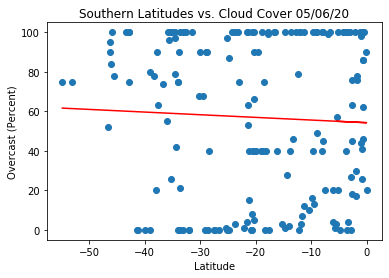

In [69]:
plt.scatter(southern_df["lat"], southern_df["cloud_cover"], marker = "o")
plt.title(f'Southern Latitudes vs. Cloud Cover {time.strftime("%m/%d/%y")}')
plt.ylabel("Overcast (Percent)")
plt.xlabel("Latitude")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df["lat"], southern_df["cloud_cover"])
regress_values = southern_df["lat"] * slope + intercept
plt.plot(southern_df["lat"],regress_values,color = "red")              
          # note the lack of cloud cover frequency in the lower latitudes.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

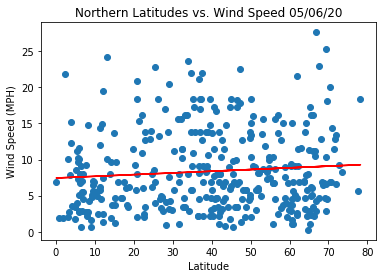

In [70]:
plt.scatter(northern_df["lat"], northern_df["wind_speed"], marker = "o")
plt.title(f'Northern Latitudes vs. Wind Speed {time.strftime("%m/%d/%y")}')
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_df["lat"], northern_df["wind_speed"])
regress_values = northern_df["lat"] * slope + intercept
plt.plot(northern_df["lat"],regress_values,color = "red")    
          # a seemngly linear activity with a few upshots of wind speed.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

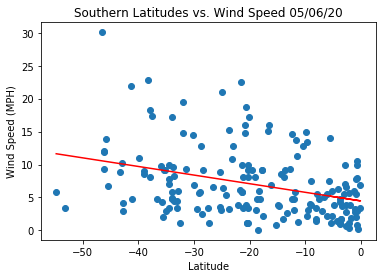

In [71]:
plt.scatter(southern_df["lat"], southern_df["wind_speed"], marker = "o")
plt.title(f'Southern Latitudes vs. Wind Speed {time.strftime("%m/%d/%y")}')
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df["lat"], southern_df["wind_speed"])
regress_values = southern_df["lat"] * slope + intercept
plt.plot(southern_df["lat"],regress_values,color = "red")              
          # Not real windy in the southern latitudes.